<a href="https://colab.research.google.com/github/lingfang23/Take-Home-Challenge/blob/main/Applying_for_a_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have access to a specific bank loan data. We have data about all loans asked to the bank, whether the bank decided to grant it and, finally, whether the borrower managed to repay it. We also have info about the person asking for the loan at the moment she is asking for the loan.



In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loan = pd.read_csv('/content/drive/MyDrive/loan/loan_table.csv')
borrower = pd.read_csv('/content/drive/MyDrive/loan/borrower_table.csv')

### Data Processing


In [ ]:
# !pip install quandl
import quandl

# Set your API key (replace YOUR_API_KEY with your actual API key)
quandl.ApiConfig.api_key = "o_AJUgtawdaM7jzvbs-R"

# Set the start and end dates
start_date = "2012-01-01"
end_date = "2012-12-31"

# Get the data for WTI crude oil prices for 2012
oil_price = quandl.get("EIA/PET_RWTC_D", start_date=start_date, end_date=end_date)

print(oil_price.head())

             Value
Date              
2012-01-03  102.96
2012-01-04  103.22
2012-01-05  101.81
2012-01-06  101.56
2012-01-09  101.31


In [ ]:
# quandl.ApiConfig.api_key = "o_AJUgtawdaM7jzvbs"

# # Set the FRED dataset code for the 10-year Treasury constant maturity rate
# dataset_code = "FRED/DGS10"

# # Set the start and end dates for the data
# start_date = "2012-01-01"
# end_date = "2012-12-31"

# # Retrieve the data from FRED using Quandl
# intrest_rate = quandl.get(dataset_code, start_date=start_date, end_date=end_date)

# # Print the first 5 rows of the data
# print(intrest_rate.head())

In [ ]:
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [ ]:
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [ ]:
duplicates = loan['loan_id'].duplicated().sum()
duplicates

0

In [ ]:
loan['date'] = pd.to_datetime(loan['date'])
earliest_date = loan['date'].min()
latest_date = loan['date'].max()

# Calculate the duration between the earliest and latest dates
duration = latest_date - earliest_date

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Duration: {duration}")

Earliest date: 2012-01-02 00:00:00
Latest date: 2012-12-28 00:00:00
Duration: 361 days 00:00:00


In [ ]:
loan.isna().sum()
# na in loan_repaid means this loan is not granted

loan_id             0
loan_purpose        0
date                0
loan_granted        0
loan_repaid     53446
dtype: int64

In [ ]:
borrower.isna().sum()
# if it's the first loan then fully_repaid_previous_loans and currently_repaying_other_loans will be NA

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

In [ ]:
print(loan.shape)
print(borrower.shape)

(101100, 5)
(101100, 12)


In [ ]:
loan.describe()

,loan_id,loan_granted,loan_repaid
count,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.471355,0.644353
std,288662.006929,0.499181,0.478714
min,30.000000,0.000000,0.000000
25%,250333.750000,0.000000,0.000000
50%,499885.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000
max,999987.000000,1.000000,1.000000


In [ ]:
borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


In [ ]:
oil_price = oil_price.reset_index().rename(columns={'Date': 'date'})

In [ ]:
df = pd.merge(loan, borrower, on='loan_id', how='left')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = pd.merge(df, oil_price, on='date', how='left')

In [ ]:
df = df.rename(columns={'Value': 'Oil_price'})

In [ ]:
df.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,date_time,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,Oil_price
0,19454,investment,2012-03-15,0,NaN,2012-03-15,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7,105.19
1,496811,investment,2012-01-17,0,NaN,2012-01-17,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5,100.70
2,929493,other,2012-02-09,0,NaN,2012-02-09,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4,99.88
3,580653,other,2012-06-27,1,1.0,2012-06-27,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,80.27
4,172419,business,2012-05-21,1,0.0,2012-05-21,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,92.57


### EDA

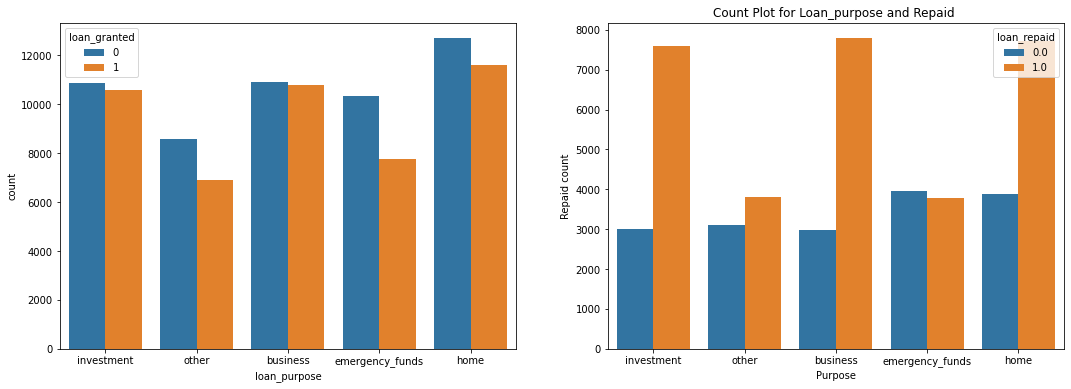

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.countplot(data=df, x='loan_purpose', hue='loan_granted',ax=ax1)

# Set the title and axis labels
plt.title("Count Plot for Loan_purpose and Granted")
plt.xlabel("Purpose")
plt.ylabel("Granted count")

sns.countplot(data=df, x='loan_purpose', hue='loan_repaid',ax=ax2)

# Set the title and axis labels
plt.title("Count Plot for Loan_purpose and Repaid ")
plt.xlabel("Purpose")
plt.ylabel("Repaid count")


# Display the plot
plt.show()

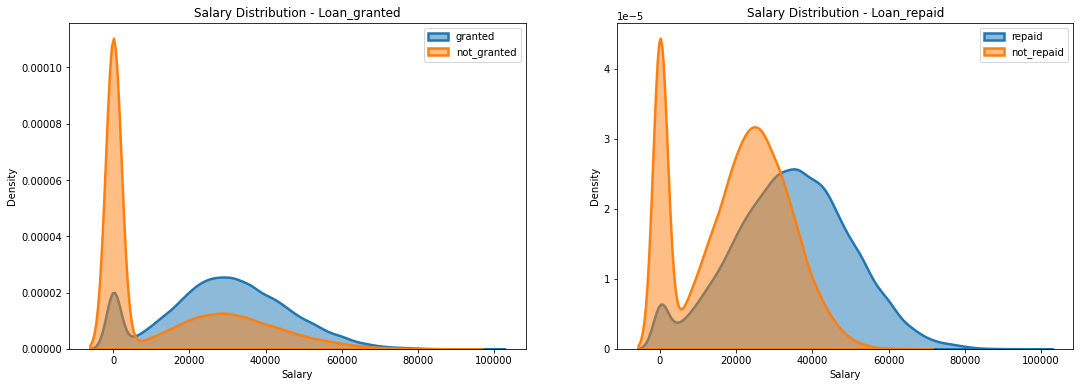

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_granted"] == 1]["yearly_salary"], label='granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
sns.kdeplot(df[df["loan_granted"] == 0]["yearly_salary"], label='not_granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
ax1.set_title("Salary Distribution - Loan_granted")
ax1.set_xlabel("Salary")
ax1.set_ylabel("Density")
ax1.legend() 

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_repaid"] == 1]["yearly_salary"], label='repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
sns.kdeplot(df[df["loan_repaid"] == 0]["yearly_salary"], label='not_repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
ax2.set_title("Salary Distribution - Loan_repaid")
ax2.set_xlabel("Salary")
ax2.set_ylabel("Density")
ax2.legend() 
# Display the plot
plt.show()

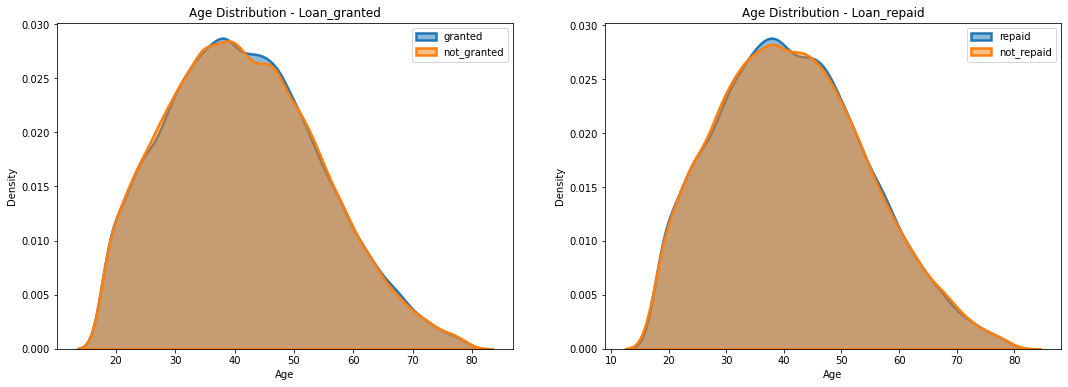

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_granted"] == 1]["age"], label='granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
sns.kdeplot(df[df["loan_granted"] == 0]["age"], label='not_granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
ax1.set_title("Age Distribution - Loan_granted")
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.legend() 

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_repaid"] == 1]["age"], label='repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
sns.kdeplot(df[df["loan_repaid"] == 0]["age"], label='not_repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
ax2.set_title("Age Distribution - Loan_repaid")
ax2.set_xlabel("Age")
ax2.set_ylabel("Density")
ax2.legend() 

# Display the plot
plt.show()

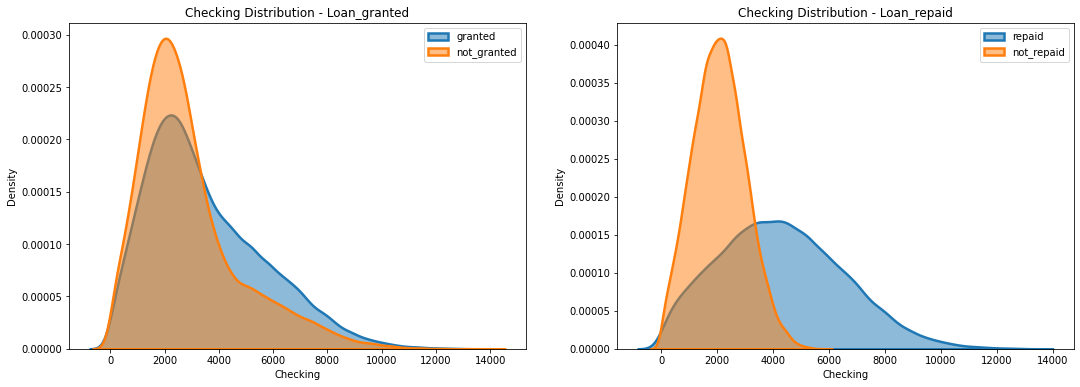

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_granted"] == 1]["checking_amount"], label='granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
sns.kdeplot(df[df["loan_granted"] == 0]["checking_amount"], label='not_granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
ax1.set_title("Checking Distribution - Loan_granted")
ax1.set_xlabel("Checking")
ax1.set_ylabel("Density")
ax1.legend() 
# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_repaid"] == 1]["checking_amount"], label='repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
sns.kdeplot(df[df["loan_repaid"] == 0]["checking_amount"], label='not_repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
ax2.set_title("Checking Distribution - Loan_repaid")
ax2.set_xlabel("Checking")
ax2.set_ylabel("Density")
ax2.legend() 

# Display the plot
plt.show()

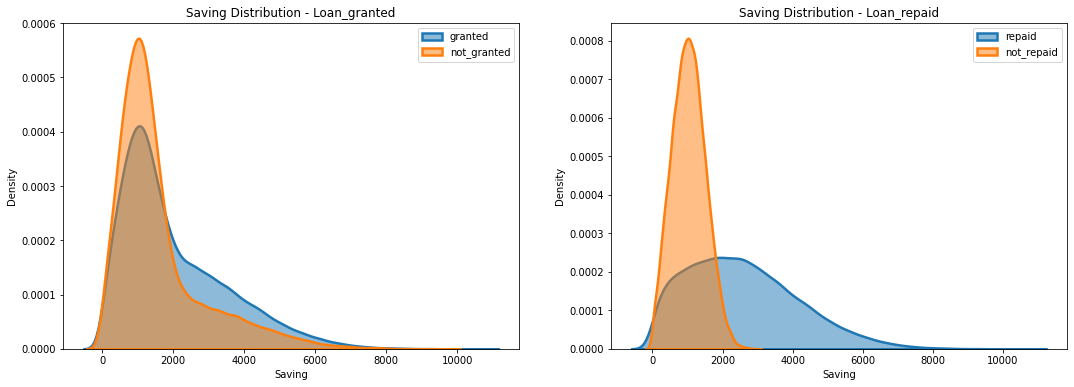

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))


# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_granted"] == 1]["saving_amount"], label='granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
sns.kdeplot(df[df["loan_granted"] == 0]["saving_amount"], label='not_granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
ax1.set_title("Saving Distribution - Loan_granted")
ax1.set_xlabel("Saving")
ax1.set_ylabel("Density")
ax1.legend() 
# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_repaid"] == 1]["saving_amount"], label='repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
sns.kdeplot(df[df["loan_repaid"] == 0]["saving_amount"], label='not_repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
ax2.set_title("Saving Distribution - Loan_repaid")
ax2.set_xlabel("Saving")
ax2.set_ylabel("Density")
ax2.legend() 

# Display the plot
plt.show()

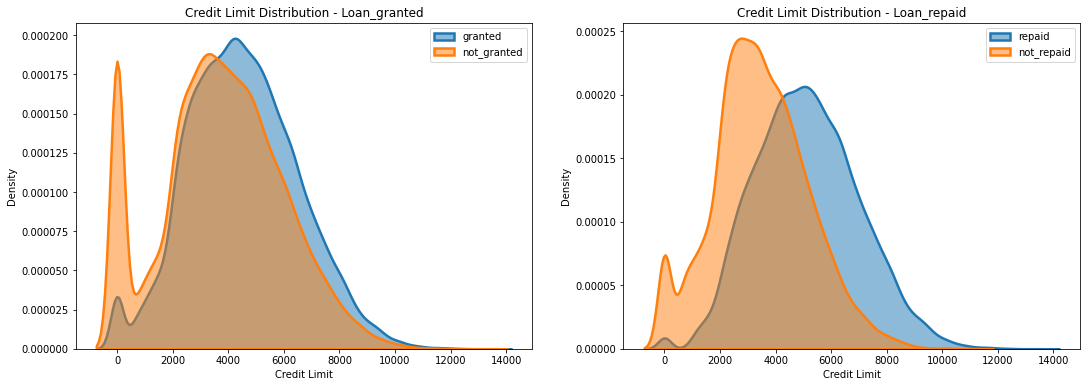

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_granted"] == 1]["total_credit_card_limit"], label='granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
sns.kdeplot(df[df["loan_granted"] == 0]["total_credit_card_limit"], label='not_granted', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax1)
ax1.set_title("Credit Limit Distribution - Loan_granted")
ax1.set_xlabel("Credit Limit")
ax1.set_ylabel("Density")
ax1.legend() 
# Create a box plot of the salary data in the subplot
sns.kdeplot(df[df["loan_repaid"] == 1]["total_credit_card_limit"], label='repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
sns.kdeplot(df[df["loan_repaid"] == 0]["total_credit_card_limit"], label='not_repaid', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax2)
ax2.set_title("Credit Limit Distribution - Loan_repaid")
ax2.set_xlabel("Credit Limit")
ax2.set_ylabel("Density")
ax2.legend() 

# Display the plot
plt.show()

<AxesSubplot:xlabel='loan_repaid', ylabel='avg_percentage_credit_card_limit_used_last_year'>

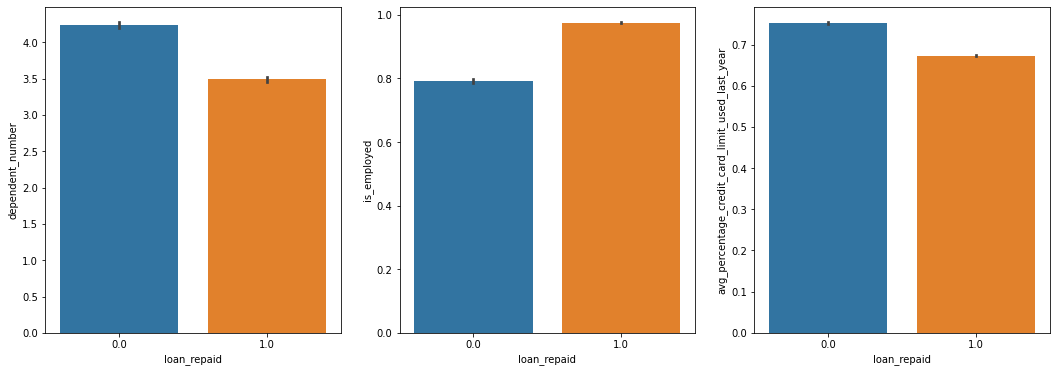

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))
sns.barplot(x='loan_repaid', y='dependent_number', data=df, ax=ax1)
sns.barplot(x='loan_repaid', y='is_employed', data=df, ax=ax2)
sns.barplot(x='loan_repaid', y='avg_percentage_credit_card_limit_used_last_year', data=df, ax=ax3)


<AxesSubplot:xlabel='loan_repaid', ylabel='currently_repaying_other_loans'>

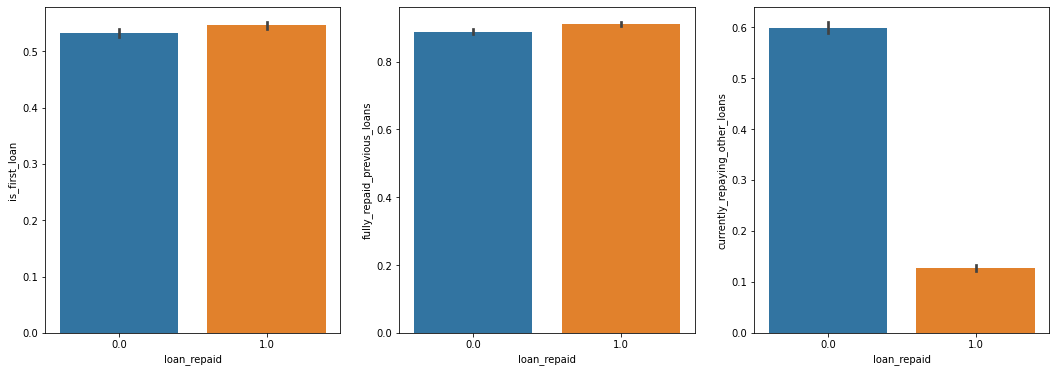

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))
sns.barplot(x='loan_repaid', y='is_first_loan', data=df, ax=ax1)
sns.barplot(x='loan_repaid', y='fully_repaid_previous_loans', data=df, ax=ax2)
sns.barplot(x='loan_repaid', y='currently_repaying_other_loans', data=df, ax=ax3)

<AxesSubplot:xlabel='loan_repaid', ylabel='Oil_price'>

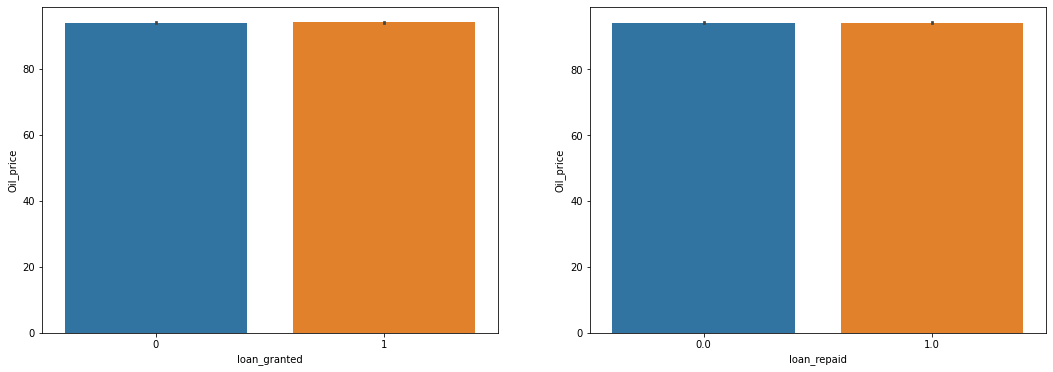

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,6))
sns.barplot(x='loan_granted', y='Oil_price', data=df, ax=ax1)
sns.barplot(x='loan_repaid', y='Oil_price', data=df, ax=ax2)

In [ ]:
df['month'] = df['date'].apply(lambda x: x.month)
df['dayofweek'] = df['date'].apply(lambda x: x.dayofweek)

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df = df.drop(labels=['loan_id', 'date',"date_time"], axis=1, inplace=False)

In [ ]:
df.head()

,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,Oil_price,month,dayofweek,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
0,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7,105.19,3,3,0,0,1,0
1,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5,100.70,1,1,0,0,1,0
2,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4,99.88,2,3,0,0,0,1
3,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,80.27,6,2,0,0,0,1
4,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,92.57,5,0,0,0,0,0


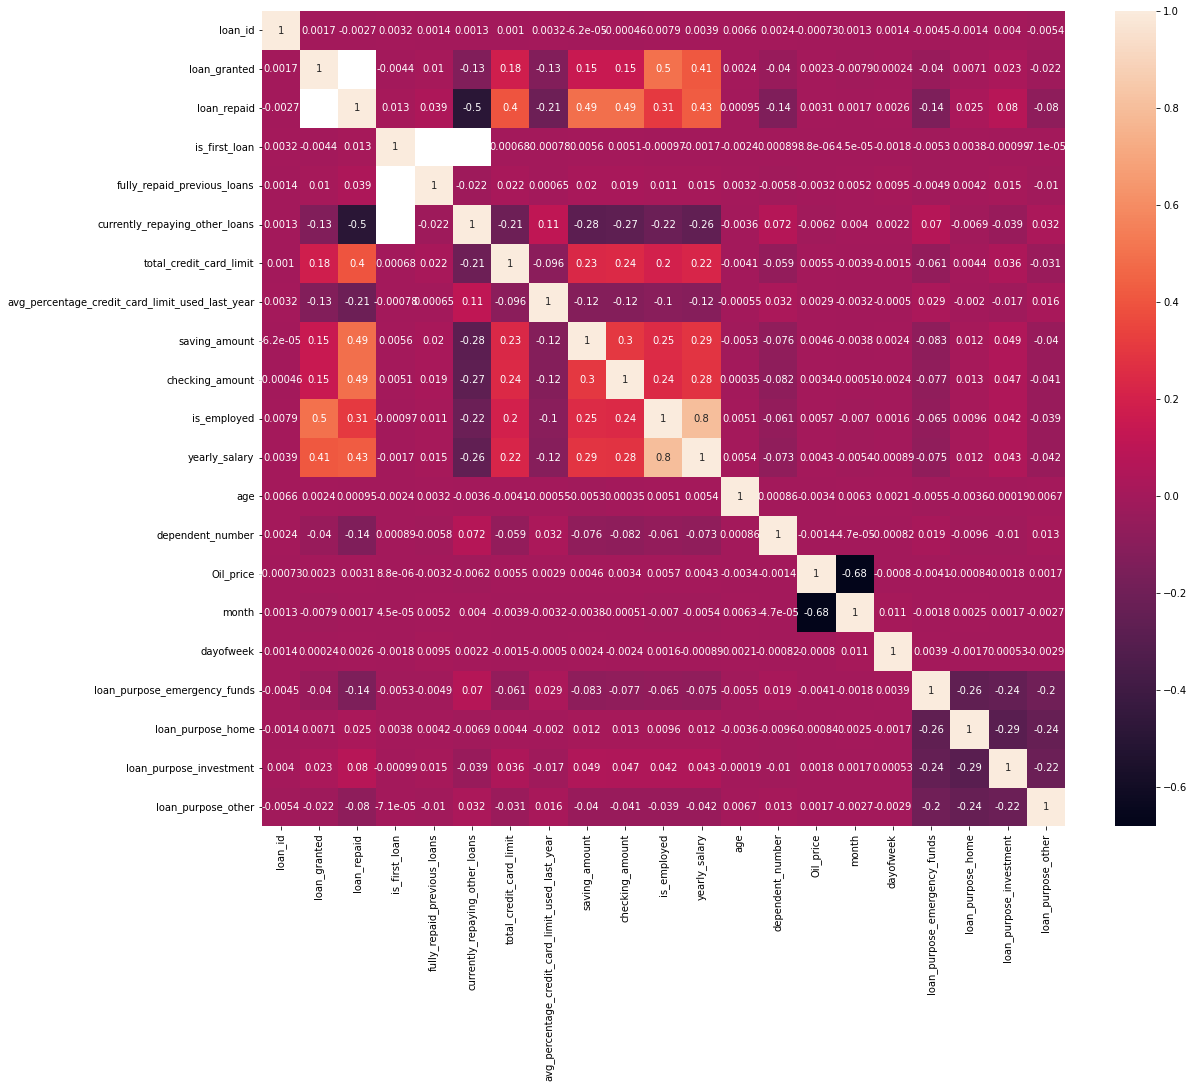

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

### EDA Insight

*   There is only 47% loans were granted and only 64% repaid. It may because most customers of this company don't have healthy finances.
*   Based on the distribution of salary, we can also find that there are few people who don't have income. Also, The mean of salary is $21020 which may indicate that customers of this company are middle and lower class.


*   Repaying other loan will influence customers' repaying ability for the loan. Therefore, I suggest to limit loan application amount to make sure everyone can repay all debt.
*   People with low salary, checking and saving amount have high probability not to repay. Even though this company has rejected a lot of applications, low income group still has significantly higher delinquency




### Machine Learning model


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/loan/p_loan.csv')

In [ ]:
grant = data.drop(["Unnamed: 0", "loan_repaid"], axis = 1)
repaid = data[data["loan_granted"] == 1].drop(["Unnamed: 0","loan_granted"], axis = 1)

In [ ]:
grant.head()

,loan_granted,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,Oil_price,month,dayofweek,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
0,0,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7,105.19,3,3,0,0,1,0
1,0,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5,100.70,1,1,0,0,1,0
2,0,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4,99.88,2,3,0,0,0,1
3,1,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,80.27,6,2,0,0,0,1
4,1,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,92.57,5,0,0,0,0,0
